In [53]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from pathlib import Path

seed = 60
# Load data
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    name='fashion_mnist',
    data_dir='./data/fashion/',
    split=['train[:90%]', 'train[10%:]', 'test'],
    download=True,
    with_info=True,
    as_supervised=True,
)

## Data

In [52]:
print(type(raw_train))
print(metadata.features)
get_label_name = metadata.features['label'].int2str
# image (28, 28, 1)

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>
FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})


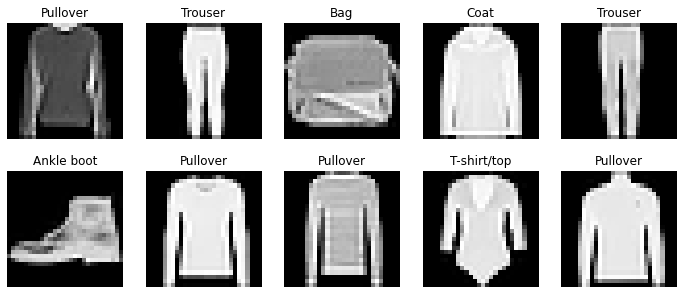

In [41]:
def plot_data(images, labels):
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    for img, label, ax in zip(images, labels, axes.flatten()):
        ax.imshow(img, cmap='gray')
        ax.set_title(f'{get_label_name(label)}')
        ax.axis('off')
    plt.show()

tf.random.set_seed(seed)
images, labels = next(raw_train.batch(10).as_numpy_iterator())
plot_data(images, labels)

In [54]:
# preprocessing
def formatting(image, label):
    image = tf.cast(image, tf.float32)  # cast to tf.float32
    image = image / 255.0
    return image, label

BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 1000
train_data = raw_train.map(formatting).shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_data = raw_validation.map(formatting).batch(BATCH_SIZE)
test_data = raw_test.map(formatting).batch(BATCH_SIZE)

In [47]:
# TODO: How many data do we have?
# check size of the `train_data`, `validation_data` and `test_data`
# hint: use `len` function

# Modeling

Spec: use sequantial model

1. Flatten Layer: make (28, 28) > (28*28)
2. Fully-Connected Layer: `hidden size = 512`, `activation function = relu` 
3. Dropout Layer: `drop rate = 0.3`
4. Fully-Connected Layer: `output size = number of class`

In [60]:
# TODO: Build Model
model = None

Use `cross-entropy loss` and `Adam` optimizer, use `'accuracy'` metric

In [61]:
# TODO: Compile the model
optimizer = None
loss_function = None
model.compile(   )

build checkpoints object

In [62]:
checkpoint_dir = Path('./checkpoints') 
checkpoint_path = checkpoint_dir / 'fashion'

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',  # use validation accuracy to save model
    save_best_only=True,
    save_weight_only=False
)

In [63]:
# fit model
EPOCHS = 10
history = model.fit(
    train_data, 
    epochs=EPOCHS, 
    validation_data=validation_data, 
    callbacks=[cp_callback]
)

Epoch 1/10
835/844 [============================>.] - ETA: 0s - loss: 0.5292 - accuracy: 0.8127INFO:tensorflow:Assets written to: checkpoints\fashion\assets


INFO:tensorflow:Assets written to: checkpoints\fashion\assets


844/844 [==============================] - 5s 5ms/step - loss: 0.5284 - accuracy: 0.8129 - val_loss: 0.3918 - val_accuracy: 0.8596
Epoch 2/10
832/844 [============================>.] - ETA: 0s - loss: 0.4001 - accuracy: 0.8554INFO:tensorflow:Assets written to: checkpoints\fashion\assets


INFO:tensorflow:Assets written to: checkpoints\fashion\assets


844/844 [==============================] - 4s 5ms/step - loss: 0.3998 - accuracy: 0.8554 - val_loss: 0.3531 - val_accuracy: 0.8693
Epoch 3/10
841/844 [============================>.] - ETA: 0s - loss: 0.3651 - accuracy: 0.8675INFO:tensorflow:Assets written to: checkpoints\fashion\assets


INFO:tensorflow:Assets written to: checkpoints\fashion\assets


844/844 [==============================] - 4s 5ms/step - loss: 0.3650 - accuracy: 0.8675 - val_loss: 0.3171 - val_accuracy: 0.8842
Epoch 4/10
842/844 [============================>.] - ETA: 0s - loss: 0.3438 - accuracy: 0.8730INFO:tensorflow:Assets written to: checkpoints\fashion\assets


INFO:tensorflow:Assets written to: checkpoints\fashion\assets


844/844 [==============================] - 4s 5ms/step - loss: 0.3437 - accuracy: 0.8730 - val_loss: 0.2972 - val_accuracy: 0.8914
Epoch 5/10
837/844 [============================>.] - ETA: 0s - loss: 0.3272 - accuracy: 0.8799INFO:tensorflow:Assets written to: checkpoints\fashion\assets


INFO:tensorflow:Assets written to: checkpoints\fashion\assets


844/844 [==============================] - 4s 5ms/step - loss: 0.3271 - accuracy: 0.8799 - val_loss: 0.2805 - val_accuracy: 0.8966
Epoch 6/10
844/844 [==============================] - 4s 5ms/step - loss: 0.3163 - accuracy: 0.8820 - val_loss: 0.2815 - val_accuracy: 0.8957
Epoch 7/10
837/844 [============================>.] - ETA: 0s - loss: 0.3042 - accuracy: 0.8882INFO:tensorflow:Assets written to: checkpoints\fashion\assets


INFO:tensorflow:Assets written to: checkpoints\fashion\assets


844/844 [==============================] - 4s 5ms/step - loss: 0.3043 - accuracy: 0.8882 - val_loss: 0.2696 - val_accuracy: 0.8986
Epoch 8/10
844/844 [==============================] - ETA: 0s - loss: 0.2949 - accuracy: 0.8912INFO:tensorflow:Assets written to: checkpoints\fashion\assets


INFO:tensorflow:Assets written to: checkpoints\fashion\assets


844/844 [==============================] - 4s 5ms/step - loss: 0.2949 - accuracy: 0.8912 - val_loss: 0.2525 - val_accuracy: 0.9061
Epoch 9/10
834/844 [============================>.] - ETA: 0s - loss: 0.2856 - accuracy: 0.8935INFO:tensorflow:Assets written to: checkpoints\fashion\assets


INFO:tensorflow:Assets written to: checkpoints\fashion\assets


844/844 [==============================] - 4s 5ms/step - loss: 0.2851 - accuracy: 0.8938 - val_loss: 0.2506 - val_accuracy: 0.9063
Epoch 10/10
844/844 [==============================] - 4s 5ms/step - loss: 0.2805 - accuracy: 0.8940 - val_loss: 0.2587 - val_accuracy: 0.9022


In [64]:
# TODO: load model to `new_model`
# hint: use `tf.keras.models.load_model`
new_model = None
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Evaluate model performance
new_model.evaluate(test_data)

157/157 [==============================] - 0s 3ms/step - loss: 0.3380 - accuracy: 0.8786


[0.33795109391212463, 0.878600001335144]